# ¿Qué es un Denoising Autoencoder?


A denoising autoencoder as its name sugests, is a robust autoencoder which can be used for error correction. It is designed to learn by training on corrupted inputs and learning how to reconstruct to the original. An input is given, which is the noisy version, that added noice with Gaussian noice, masking pixels or dropout. The is passed through an encoder, which maps to a lower dimensional latent space to learn how to remove noice. The there is the decoder, qich reconstruct to the original representation, it wants to minimize the difference between the reconstructed and the input with the loss funnction.

In [34]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D

from keras.utils import to_categorical

In [35]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

In [ ]:
model = Sequential([
     Conv2D(
        filters=32,
        strides=1,
        kernel_size= (3,3),
        padding='same', #no se aplica
        activation='relu',
        input_shape=(32,32,3)
    ),

    Conv2D(
        strides=1,
        filters=64,
        kernel_size= (3,3),
        activation='relu',
        padding='same', #no se aplica
         ),
    
    # Conv2D(
    #     strides=1,
    #     filters=128,
    #     kernel_size= (3,3),
    #     activation='relu',
    #     padding='same', #no se aplica
    #      ),
    
    # Conv2D(
    #     strides=1,
    #     filters=256,
    #     kernel_size= (3,3),
    #     activation='relu',
    #     padding='same', #no se aplica
    #      ),
    Flatten(),

    Dense(units= 100, activation='softmax')
])

In [37]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │    26,214,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,602,916 (101.48 MB)

 Trainable params: 26,602,916 (101.48 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [39]:
x_train, x_test = x_train / 255.0, x_test / 255.0   # normalizar la imagen entre 0 y 1
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [40]:
model.fit(x_train, y_train, epochs=5, validation_split=0.10)

Epoch 1/5
1138/1407 ━━━━━━━━━━━━━━━━━━━━ 3:23 757ms/step - accuracy: 0.0819 - loss: 4.1770

KeyboardInterrupt: 

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Pérdida en test: {loss:.4f}, Precisión en test: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.2954 - loss: 5.5387
Pérdida en test: 5.5307, Precisión en test: 0.2946


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


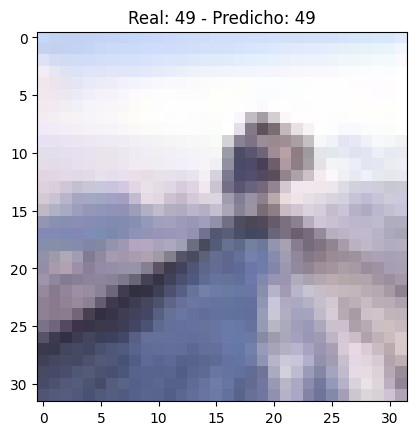

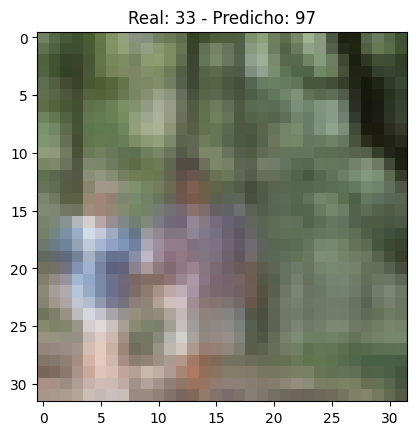

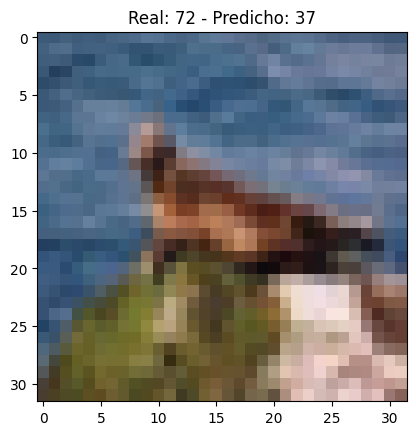

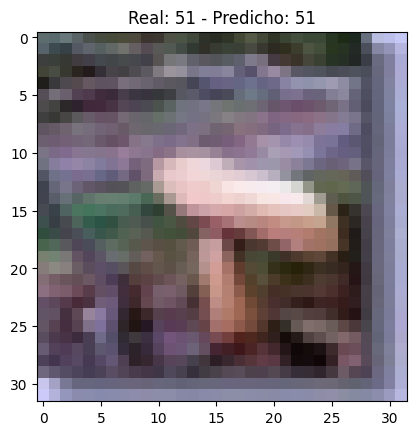

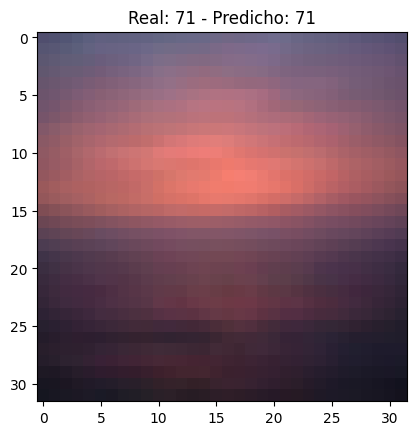

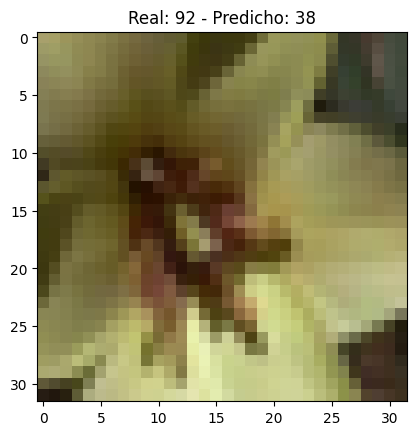

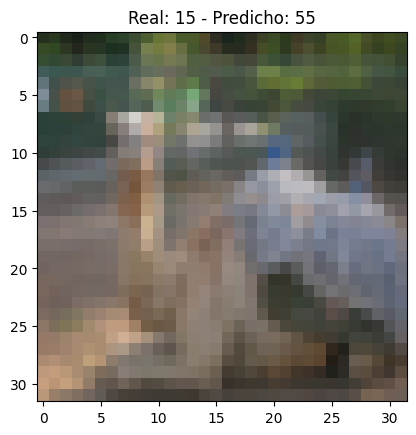

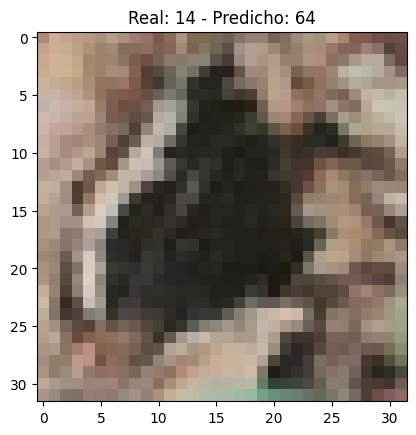

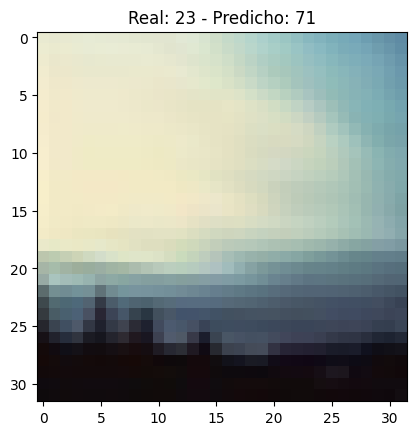

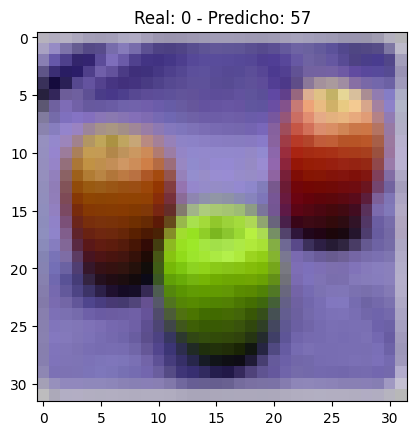

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(x_test[:10])

for i in range(10):
    plt.imshow(x_test[i])
    plt.title(f"Real: {np.argmax(y_test[i])} - Predicho: {np.argmax(predictions[i])}")
    plt.show()